# Project 2: Titanic Dataset Exploration
**Author:** Deb St. Cyr  
**Date:** October 30, 2025

## Introduction
This notebook explores the Titanic passenger dataset using a structured, professional workflow modeled after Lab 2. We will:
- Import and inspect the data
- Explore distributions and relationships with visualizations
- Handle missing values and engineer simple features
- Select features and define a prediction target
- Compare a basic train/test split to a stratified split
Each section ends with brief **Reflection** prompts.

In [1]:
# Imports (single cell, import each lib only once)
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Display settings for readability
pd.set_option("display.max_columns", 100)
sns.set_theme()

## 1. Import and Inspect the Data
We load the Titanic dataset **directly from seaborn** for consistency across environments.

In [2]:
# Load the Titanic dataset
titanic = sns.load_dataset("titanic")

# Basic info
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
# First 10 rows
print(titanic.head(10))

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

In [4]:
# Missing values per column
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
# Summary statistics (numeric only)
print(titanic.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [6]:
# Correlations (numeric only to avoid warnings)
print(titanic.corr(numeric_only=True))

            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000  


### Reflection 1
1) How many data instances are there?  
2) How many total features (columns) are there?  
3) What are their names?  
4) Which columns have missing values?  
5) Which features are **non-numeric**?  
6) Are the data instances sorted on any attribute?  
7) What are the units of `age`? (How can you tell?)  
8) What are the min, median, and max of `age`?  
9) Which **two different** features have the highest correlation?  
10) Which categorical features might be useful for prediction, and why?

## 2. Data Exploration and Preparation
We'll visualize numerical distributions and simple relationships. For categorical features, use count or bar plots.

### 2.1 Explore Data Patterns and Distributions

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='fare', ylabel='age'>,
        <Axes: xlabel='pclass', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='fare'>,
        <Axes: xlabel='fare', ylabel='fare'>,
        <Axes: xlabel='pclass', ylabel='fare'>],
       [<Axes: xlabel='age', ylabel='pclass'>,
        <Axes: xlabel='fare', ylabel='pclass'>,
        <Axes: xlabel='pclass', ylabel='pclass'>]], dtype=object)

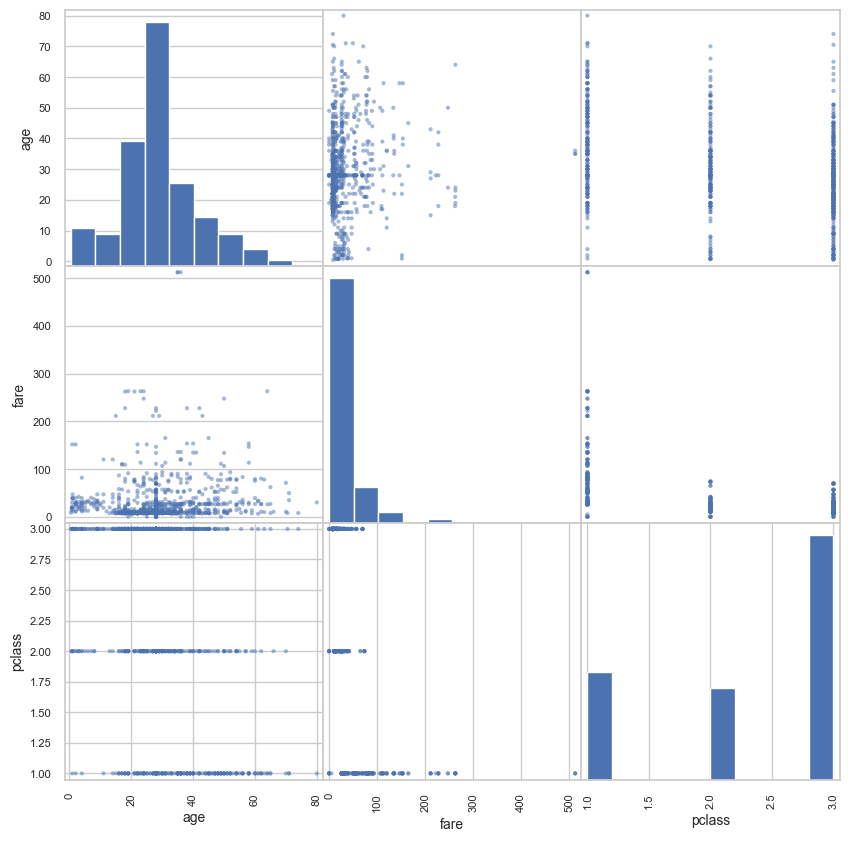

In [171]:
# Scatter matrix for age, fare, and pclass
attributes = ["age", "fare", "pclass"]
scatter_matrix(titanic[attributes], figsize=(10, 10))

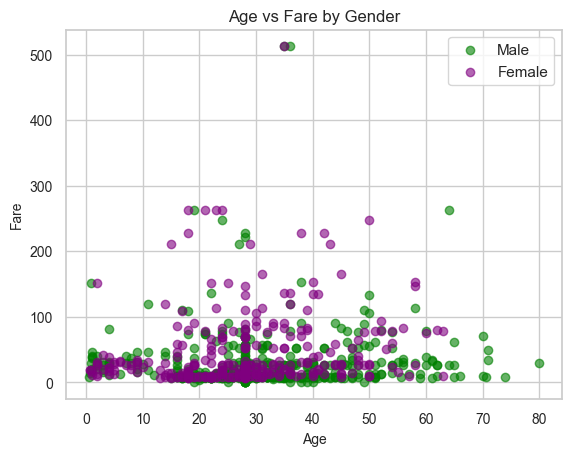

In [ ]:
# Scatterplot: age vs fare
male = titanic[titanic["sex"] == "male"]
female = titanic[titanic["sex"] == "female"]

plt.scatter(male["age"], male["fare"], color="green", alpha=0.6, label="Male")
plt.scatter(female["age"], female["fare"], color="purple", alpha=0.6, label="Female")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Age vs Fare by Gender")
plt.legend()
plt.show()


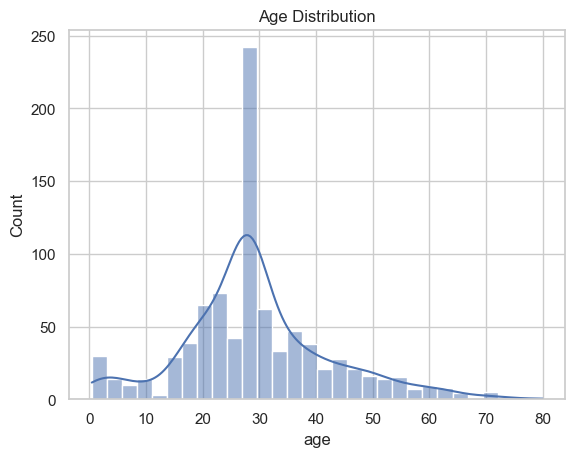

In [253]:
# Histogram of age
sns.histplot(titanic["age"], kde=True)
plt.title("Age Distribution")
plt.show()

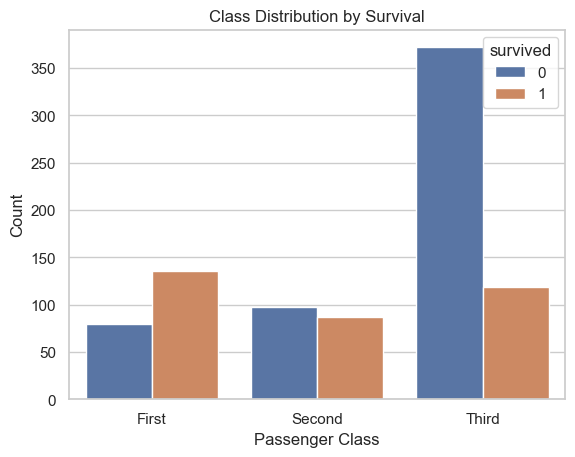

In [254]:
# Count plot: class by survival
sns.countplot(x="class", hue="survived", data=titanic)
plt.title("Class Distribution by Survival")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

**Reflection 2.1**  
- What patterns or anomalies do you notice?  
- Which features look promising as predictors of survival?  
- Do you see any **class imbalances** in the target (`survived`)?

### 2.2 Handle Missing Values and Clean Data

In [255]:
# Impute Age with the median (in place)
titanic["age"].fillna(titanic["age"].median(), inplace=True)

# Fill embark_town with the mode (most frequent value)
if titanic["embark_town"].isnull().any():
    titanic["embark_town"].fillna(titanic["embark_town"].mode()[0], inplace=True)

# (Optional) You can also fill deck or who if needed; keeping minimal for now.
titanic.isnull().sum()

C:\Users\debcy\AppData\Local\Temp\ipykernel_6616\81203916.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["age"].fillna(titanic["age"].median(), inplace=True)


survived          0
pclass            0
sex               0
age               0
sibsp             0
parch             0
fare              0
embarked          2
class             0
who               0
adult_male        0
deck            688
embark_town       0
alive             0
alone             0
family_size       0
sex_num           0
embarked_num      2
alone_num         0
dtype: int64

### 2.3 Feature Engineering

In [256]:
# Family size = sibsp + parch + 1 (self)
titanic["family_size"] = titanic["sibsp"] + titanic["parch"] + 1

# Encode categoricals to numeric (new columns to preserve originals)
titanic["sex_num"] = titanic["sex"].map({"male": 0, "female": 1})
titanic["embarked_num"] = titanic["embarked"].map({"C": 0, "Q": 1, "S": 2})

# Binary 'alone' feature (already exists as bool -> convert to int copy)
titanic["alone_num"] = titanic["alone"].astype(int)

titanic[["family_size", "sex_num", "embarked_num", "alone_num"]].head()

,family_size,sex_num,embarked_num,alone_num
0,2,0,2.0,0
1,2,1,0.0,0
2,1,1,2.0,1
3,2,1,2.0,0
4,1,0,2.0,1


**Reflection 2.3**  
- Why might `family_size` help predict survival?  
- Why convert categorical features to numbers before modeling?

## 3. Feature Selection and Justification
We'll use **survived** as the classification target and select several intuitive predictors.

In [257]:
# Select features (X) and target (y)
feature_cols = ["age", "fare", "pclass", "sex_num", "family_size"]
X = titanic[feature_cols].copy()
y = titanic["survived"].copy()

X.head(), y.head()

(    age     fare  pclass  sex_num  family_size
 0  22.0   7.2500       3        0            2
 1  38.0  71.2833       1        1            2
 2  26.0   7.9250       3        1            1
 3  35.0  53.1000       1        1            2
 4  35.0   8.0500       3        0            1,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: survived, dtype: int64)

**Reflection 3**  
- Why these features? Which do you expect to be most predictive and why?  
- Are there any other features you'd consider adding or removing?

## 4. Splitting
Compare a **basic train/test split** with a **stratified** split (stratified by the target `survived`).

In [258]:
# Basic train/test split
X_train_basic, X_test_basic, y_train_basic, y_test_basic = train_test_split(
    X, y, test_size=0.2, random_state=123
)

print("Basic Split — Train size:", len(X_train_basic), " Test size:", len(X_test_basic))

Basic Split — Train size: 712  Test size: 179


In [259]:
# Stratified split by the target 'survived'
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx, test_idx in splitter.split(X, y):
    X_train_strat = X.iloc[train_idx]
    X_test_strat  = X.iloc[test_idx]
    y_train_strat = y.iloc[train_idx]
    y_test_strat  = y.iloc[test_idx]

print("Stratified Split — Train size:", len(X_train_strat), " Test size:", len(X_test_strat))

Stratified Split — Train size: 712  Test size: 179


In [260]:
# Compare class distributions (original vs. each split)
print("Original Class Distribution (survived):")
print(y.value_counts(normalize=True).sort_index())

print("\nBasic Split — Class Distribution (survived):")
print(y_train_basic.value_counts(normalize=True).sort_index())
print(y_test_basic.value_counts(normalize=True).sort_index())

print("\nStratified Split — Class Distribution (survived):")
print(y_train_strat.value_counts(normalize=True).sort_index())
print(y_test_strat.value_counts(normalize=True).sort_index())

Original Class Distribution (survived):
survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Basic Split — Class Distribution (survived):
survived
0    0.610955
1    0.389045
Name: proportion, dtype: float64
survived
0    0.636872
1    0.363128
Name: proportion, dtype: float64

Stratified Split — Class Distribution (survived):
survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64
survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


**Reflection 4**  
- Why does stratification (by `survived`) often improve model evaluation quality?  
- How close are the split distributions compared to the original?  
- Which split preserved class balance better here?

## Bonus (Optional)
Repeat this workflow for another dataset (Iris, Breast Cancer, Wine, Pima Diabetes).  
Clearly label as **Bonus** and include a short paragraph on what changed in your process and why.